# DAT Project 2

### Problem Statement
Online shopping has become increasingly prevalent, with millions of sessions occurring daily on e-commerce platforms. Understanding customer behavior during these sessions is crucial for improving conversions and enhancing user experience. Using the Online Shoppers Purchasing Intention Dataset, we aim to predict whether a session will result in a purchase (Revenue). Insights derived from this project can help businesses tailor their marketing strategies, optimize their website design, and drive revenue growth.

### Dataset Introduction
The dataset consists of 12,330 sessions captured from an online retail platform, with 18 features capturing session attributes such as:

- Behavioral Metrics: Number of pages visited (Administrative, ProductRelated), time spent, bounce rates, and exit rates.
- Demographics: Geographic region, operating system, and browser.
- Temporal Information: Month of the visit and proximity to special days.
- Target Variable: Revenue (binary) - indicates whether the session resulted in a purchase.

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

/Users/Jaanvi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import layers

#Some scikitlearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# And the usual suspects
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
shopping = pd.read_csv('online_shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Exploratory Data Analysis

In [4]:
shopping.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### Comprehensive feature description

| Variable Name             | Type         | Role                                                    |
|:--------------------------|:-------------|:--------------------------------------------------------|
| Administrative            | Integer      | Number of administrative pages visited                  |
| Administrative_Duration   | Integer      | Total time spent on administrative pages                |
| Informational             | Integer      | Number of informational pages visited                   |
| Informational_Duration    | Integer      | Total time spent on informational pages                 |
| ProductRelated            | Integer      | Number of product-related pages visited                 |
| ProductRelated_Duration   | Continuous   | Total time spent on product-related pages               |
| BounceRates               | Continuous   | Average bounce rate of the visited pages                |
| ExitRates                 | Continuous   | Average exit rate of the visited pages                  |
| PageValues                | Integer      | Value of the pages visited                              |
| SpecialDay                | Integer      | Proximity to a special day (e.g., holiday or promotion) |
| Month                     | Categorical  | Month of the visit                                      |
| OperatingSystems          | Integer      | Operating system used                                   |
| Browser                   | Integer      | Browser used                                            |
| Region                    | Integer      | Geographic region of the visitor                       |
| TrafficType               | Integer      | Source of the website traffic                          |
| VisitorType               | Categorical  | Type of visitor (e.g., New or Returning)               |
| Weekend                   | Binary       | Whether the visit occurred on a weekend                |
| Revenue                   | Binary       | Whether the visit resulted in a purchase (target)      |



In [5]:
shopping.shape

(12330, 18)

In [6]:
shopping.info()   # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
shopping['Month'].value_counts() #sessions per month

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [8]:
# Monthly revenue
monthly_revenue = shopping.groupby('Month')['Revenue'].sum()

print(monthly_revenue)

Month
Aug      76
Dec     216
Feb       3
Jul      66
June     29
Mar     192
May     365
Nov     760
Oct     115
Sep      86
Name: Revenue, dtype: int64


In [9]:
# Converting 'Month' to numerical values using ordinal encoding
month_mapping = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'Oct': 10, 'June': 6, 'Jul': 7, 'Aug': 8, 'Nov': 11, 'Sep': 9, 'Dec': 12
}
shopping['Month'] = shopping['Month'].map(month_mapping)

In [10]:
# Checking if there are any missing or unmapped values
print(shopping['Month'].isnull().sum()) 

# Checkede the unique values after mapping
print(shopping['Month'].unique())

0
[ 2  3  5 10  6  7  8 11  9 12]


In [11]:
# Encode 'VisitorType' 
shopping['VisitorType'] = (shopping['VisitorType'] == 'Returning_Visitor').astype(int)

In [12]:
# Ensuring 'Weekend' is encoded as 0 and 1
shopping['Weekend'] = shopping['Weekend'].astype(int)

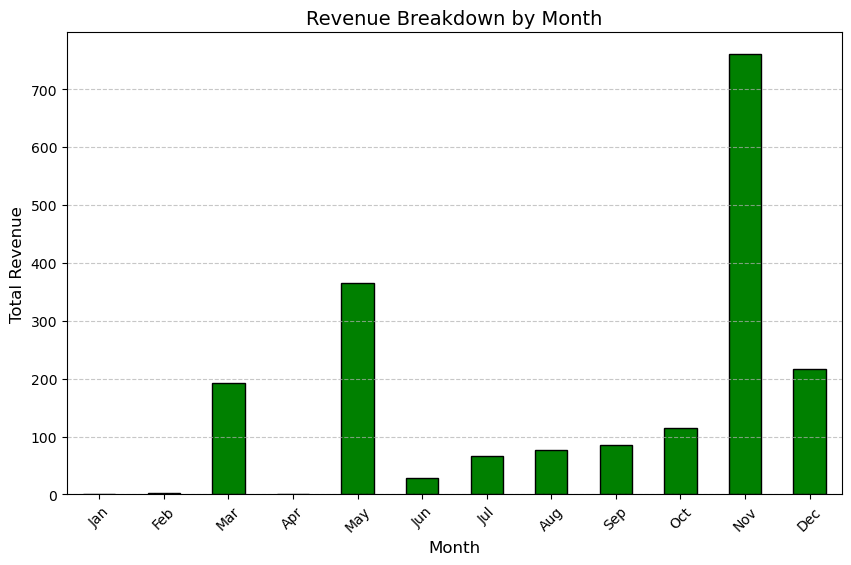

In [13]:
import matplotlib.pyplot as plt
 # Monthly revenue bar blot
import numpy as np
all_months = np.arange(1, 13)
monthly_revenue = shopping.groupby('Month')['Revenue'].sum()
monthly_revenue = monthly_revenue.reindex(all_months, fill_value=0)

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='green', edgecolor='black')
plt.title('Revenue Breakdown by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- The dataset is dominated by sessions in May and November.
- Few sessions occurred in February and June, indicating possible seasonal trends.

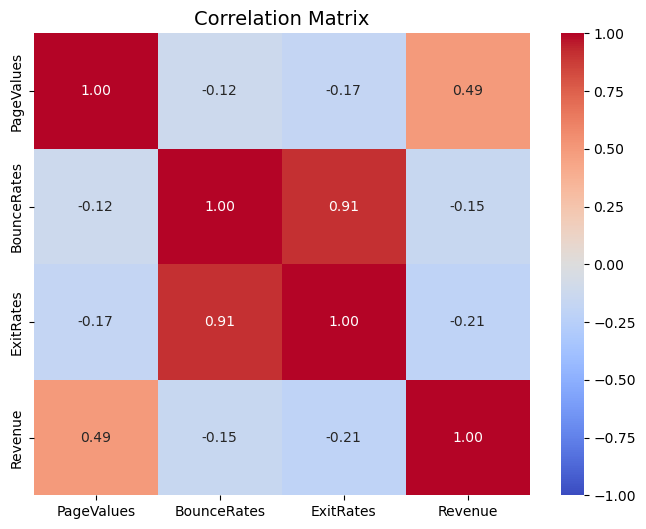

In [14]:
correlation_features = ['PageValues', 'BounceRates', 'ExitRates', 'Revenue']
correlation_matrix = shopping[correlation_features].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Insights:
- PageValues is strongly correlated with Revenue (positive correlation), making it a critical feature for predictions.
- BounceRates and ExitRates show moderate negative correlations with Revenue.

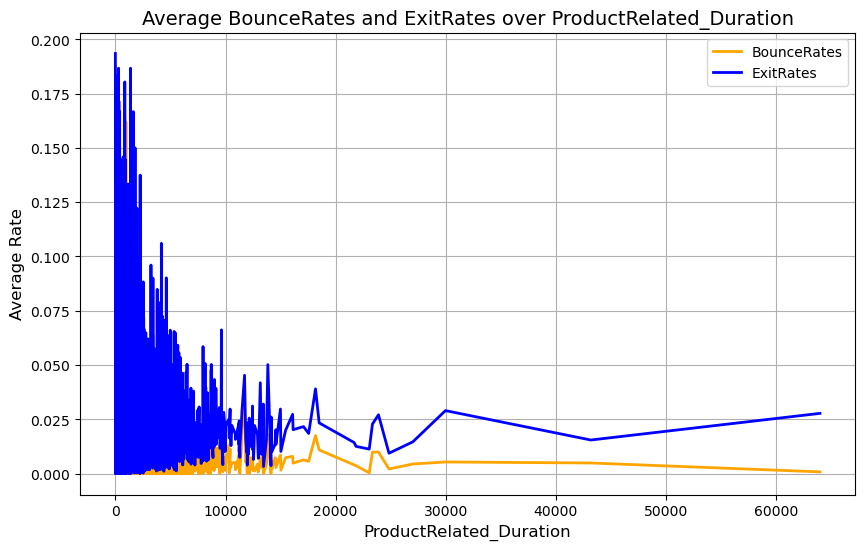

In [15]:
# Group by ProductRelated_Duration to calculate the average of BounceRates and ExitRates
user_engagement = shopping.groupby('ProductRelated_Duration')[['BounceRates', 'ExitRates']].mean()


plt.figure(figsize=(10, 6))
plt.plot(user_engagement.index, user_engagement['BounceRates'], label='BounceRates', color='orange', lw=2)
plt.plot(user_engagement.index, user_engagement['ExitRates'], label='ExitRates', color='blue', lw=2)
plt.title('Average BounceRates and ExitRates over ProductRelated_Duration', fontsize=14)
plt.xlabel('ProductRelated_Duration', fontsize=12)
plt.ylabel('Average Rate', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


- High Bounce Rates at Low ProductRelated_Duration: Users spending minimal time on product-related pages tend to bounce quickly, highlighting the need for improved initial engagement through faster page loading, better content, and compelling calls-to-action.

- Exit Rates and Engagement: Exit rates are generally higher than bounce rates and fluctuate as time on product pages increases. This suggests opportunities to refine the user journey, especially during longer sessions, by addressing potential friction points and providing additional support (e.g., live chat or dynamic recommendations).

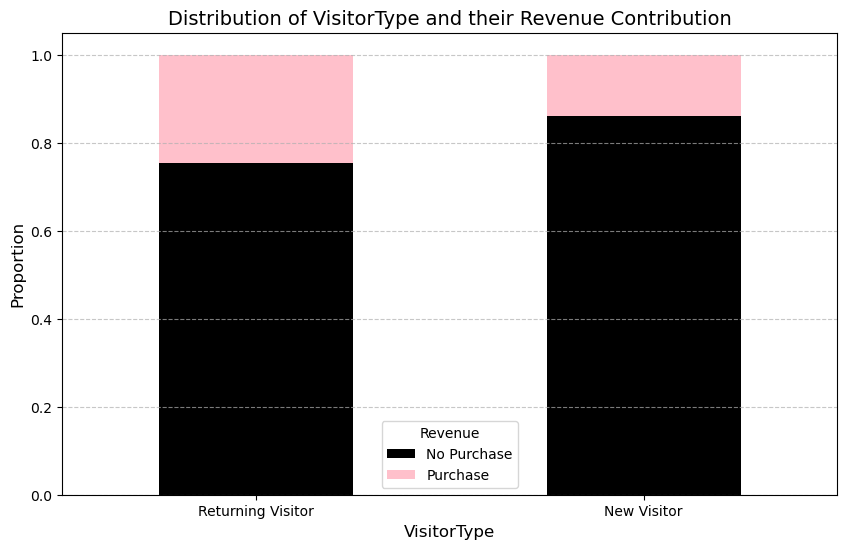

In [16]:
# Create a pivot table for the distribution of VisitorType and Revenue
visitor_revenue = pd.crosstab(shopping['VisitorType'], shopping['Revenue'], normalize='index')

# Plotting the Stacked Bar Chart
visitor_revenue.plot(kind='bar', stacked=True, color=['black', 'pink'], figsize=(10, 6))
plt.title('Distribution of VisitorType and their Revenue Contribution', fontsize=14)
plt.xlabel('VisitorType', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Revenue', labels=['No Purchase', 'Purchase'])
plt.xticks([0, 1], ['Returning Visitor', 'New Visitor'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Returning visitors are the most valuable segment, contributing the largest share of revenue. Invest in strategies to retain and further engage this group.
- New visitors represent an untapped potential with low purchase rates. Optimizing the onboarding experience and offering first-time incentives can improve their conversion rates.


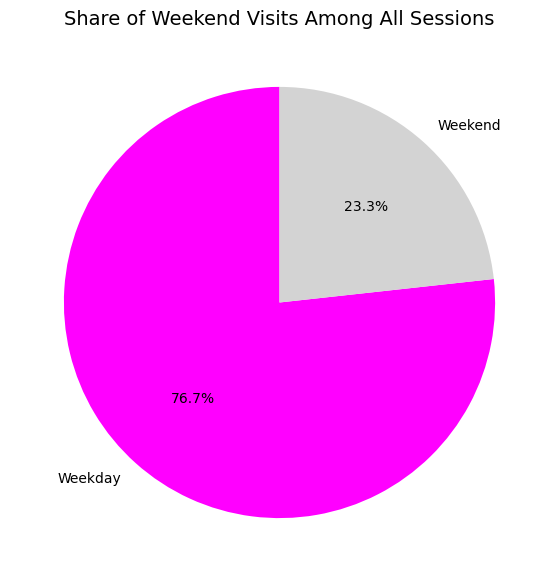

In [17]:
# Calculate the share of weekend visits
weekend_share = shopping['Weekend'].value_counts(normalize=True)

plt.figure(figsize=(7, 7))
weekend_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['magenta', 'lightgrey'], labels=['Weekday', 'Weekend'])
plt.title('Share of Weekend Visits Among All Sessions', fontsize=14)
plt.ylabel('')
plt.show()


The majority of visits occur on weekdays, it could indicate that users are browsing during workdays or taking advantage of free time during office hours.

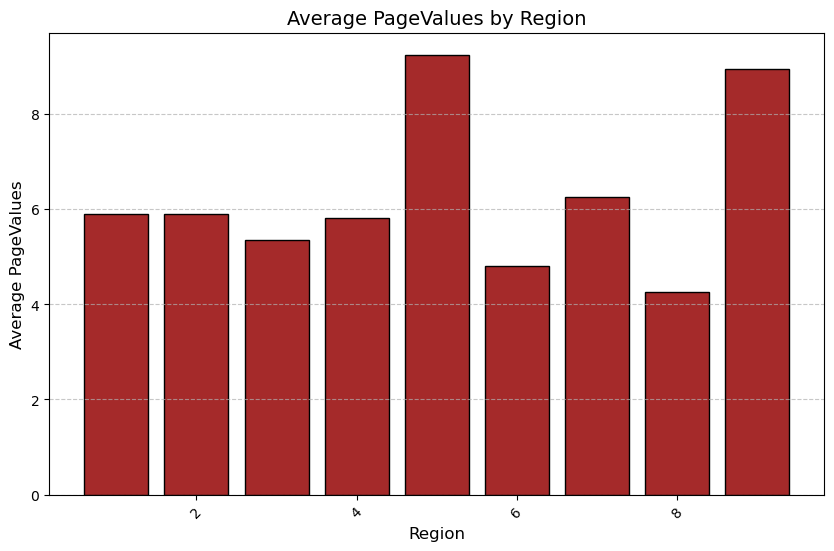

In [18]:
# Group by Region and calculate the average PageValues
region_pagevalues = shopping.groupby('Region')['PageValues'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(region_pagevalues['Region'], region_pagevalues['PageValues'], color='brown', edgecolor='black')
plt.title('Average PageValues by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average PageValues', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


High-performing regions represent the platform's core audience, while low-performing regions offer untapped potential if engagement strategies are adjusted to meet regional needs.

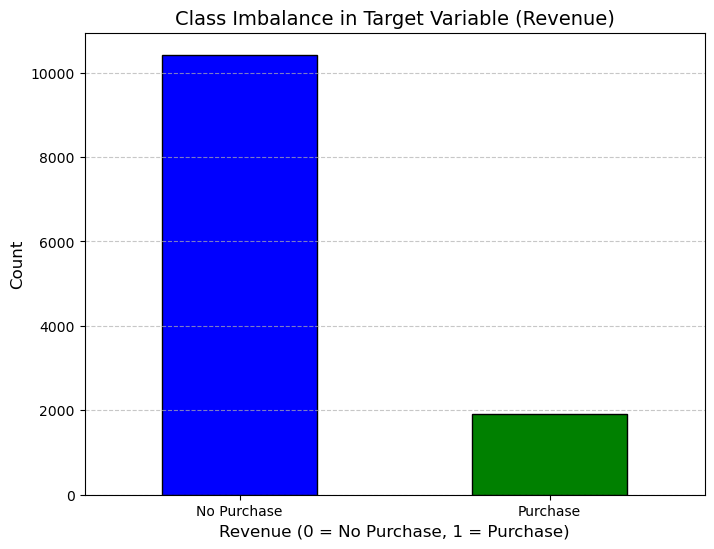

In [19]:
# The distribution of the target variable (Revenue)
target_distribution = shopping['Revenue'].value_counts()

plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color=['blue', 'green'], edgecolor='black')
plt.title('Class Imbalance in Target Variable (Revenue)', fontsize=14)
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Purchase', 'Purchase'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Train/Test split

In [20]:
#Defining our predictors and target variable
X = shopping[shopping.columns.difference(['Revenue'])]
y = shopping['Revenue']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = shopping['Revenue'])

In [21]:
X_train

,Administrative,Administrative_Duration,BounceRates,Browser,ExitRates,Informational,Informational_Duration,Month,OperatingSystems,PageValues,ProductRelated,ProductRelated_Duration,Region,SpecialDay,TrafficType,VisitorType,Weekend
4263,8,732.250000,0.005128,3,0.013342,0,0.0,5,3,12.274195,34,1345.755952,3,0.8,2,1,0
5905,0,0.000000,0.040000,8,0.100000,0,0.0,10,1,0.000000,4,157.200000,3,0.0,1,1,1
9434,0,0.000000,0.000000,10,0.050000,0,0.0,12,2,0.000000,4,42.000000,1,0.0,2,1,0
3505,2,338.000000,0.012500,2,0.037500,0,0.0,5,3,19.236250,17,1205.566667,2,0.8,2,1,0
2067,0,0.000000,0.000000,2,0.000587,0,0.0,3,2,54.676348,32,827.646212,7,0.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,4,69.000000,0.010526,2,0.049123,1,0.0,5,2,22.329347,19,580.500000,1,0.0,3,1,1
1200,4,16.666667,0.002941,2,0.012843,0,0.0,3,2,0.000000,68,2593.741667,4,0.0,8,1,0
2398,0,0.000000,0.023529,2,0.051961,0,0.0,5,3,0.000000,17,433.133333,4,1.0,4,1,1
11106,0,0.000000,0.002740,2,0.015318,0,0.0,11,2,6.135982,73,2784.800000,5,0.0,2,1,1


## Encoding Variables

In [22]:
ordinal_encoder = OrdinalEncoder()
# Only fitting it to training data
y_train = ordinal_encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = ordinal_encoder.transform(y_test.values.reshape(-1,1))


In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()


X_train = pd.DataFrame(std_scaler.fit_transform(X_train), 
                                      columns=X_train.columns, 
                                      index=X_train.index)

X_test = pd.DataFrame(std_scaler.transform(X_test), 
                                     columns=X_test.columns, 
                                     index=X_test.index)


X_train.head()

,Administrative,Administrative_Duration,BounceRates,Browser,ExitRates,Informational,Informational_Duration,Month,OperatingSystems,PageValues,ProductRelated,ProductRelated_Duration,Region,SpecialDay,TrafficType,VisitorType,Weekend
4263,1.712088,3.624745,-0.353793,0.365443,-0.612923,-0.395782,-0.244589,-0.777102,0.950345,0.341014,0.058405,0.083393,-0.063769,3.663440,-0.515854,0.41025,-0.549238
5905,-0.698294,-0.452341,0.360698,3.251075,1.159262,-0.395782,-0.244589,0.696037,-1.228182,-0.320268,-0.629459,-0.539163,-0.063769,-0.311499,-0.764918,0.41025,1.820703
9434,-0.698294,-0.452341,-0.458865,4.405328,0.136746,-0.395782,-0.244589,1.285293,-0.138919,-0.320268,-0.629459,-0.599504,-0.898557,-0.311499,-0.515854,0.41025,-0.549238
3505,-0.095698,1.429605,-0.202751,-0.211683,-0.118883,-0.395782,-0.244589,-0.777102,0.950345,0.716100,-0.331385,0.009963,-0.481163,3.663440,-0.515854,0.41025,-0.549238
2067,-0.698294,-0.452341,-0.458865,-0.211683,-0.873776,-0.395782,-0.244589,-1.366357,-0.138919,2.625461,0.012548,-0.187989,1.605808,-0.311499,-0.515854,0.41025,-0.549238


In [24]:
y_train = np.array(y_train)

## Neural Network

In [25]:
# Creating Neural Network model using Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42) # Setting the seed for reproducability
input_shape = (X_train.shape[1],)

nn_model = keras.Sequential([
   keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
], name='nn_model')

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
nn_model.summary()

/Users/Jaanvi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "nn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Fitting the model on train data

history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.8496 - loss: 0.3633 - val_accuracy: 0.8946 - val_loss: 0.2673
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9030 - loss: 0.2503 - val_accuracy: 0.8941 - val_loss: 0.2557
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9007 - loss: 0.2374 - val_accuracy: 0.8961 - val_loss: 0.2523
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9056 - loss: 0.2313 - val_accuracy: 0.8956 - val_loss: 0.2508
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9059 - loss: 0.2270 - val_accuracy: 0.8961 - val_loss: 0.2500
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9065 - loss: 0.2235 - val_accuracy: 0.8976 - val_loss: 0.2495
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9070 - loss: 0.2202 - val_accuracy: 0.8971 - val_loss: 0.2490
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9094 - loss: 0

In [27]:
# Model evaluation using test accuracy
test_loss, test_acc = nn_model.evaluate(X_test, y_test.astype('float64'))
print(f'Test Accuracy: {test_acc}')

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8927 - loss: 0.2731
Test Accuracy: 0.8909164667129517


309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


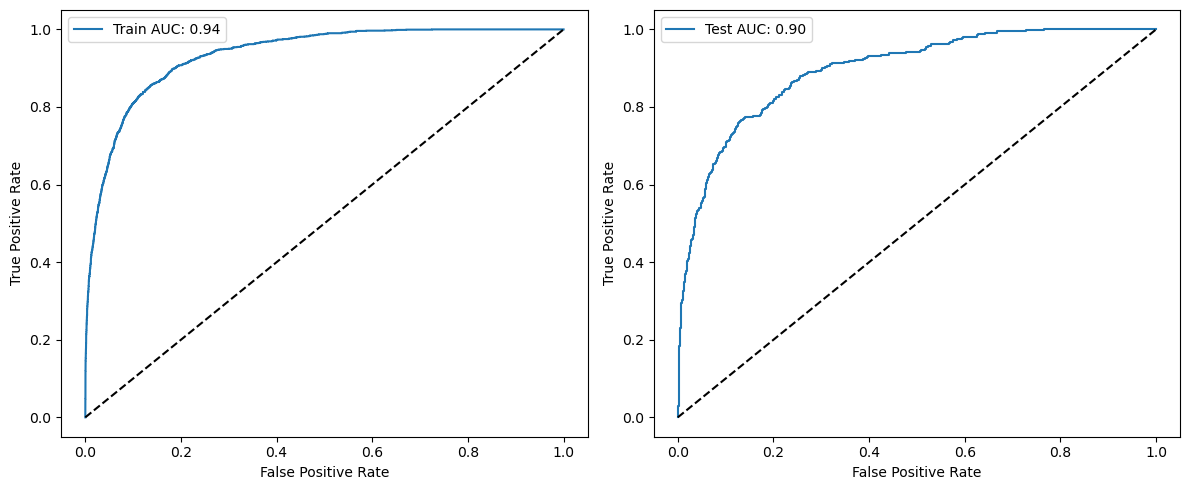

In [28]:
# Model evaluation using ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
y_train_prob = nn_model.predict(X_train).ravel()
y_test_prob = nn_model.predict(X_test).ravel()
y_train_prob = np.nan_to_num(y_train_prob, nan=0.0)
y_test_prob = np.nan_to_num(y_test_prob, nan=0.0)

fpr_train, tpr_train, thres_train = roc_curve(y_train, y_train_prob)
auc_train = roc_auc_score(y_train, y_train_prob)
fpr_test, tpr_test, thres_test = roc_curve(y_test, y_test_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(fpr_train, tpr_train, label = f'Train AUC: {auc_train:.2f}')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

ax[1].plot(fpr_test, tpr_test, label = f'Test AUC: {auc_test:.2f}')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend()

plt.tight_layout()
plt.show()

In [29]:
# More evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print('Classification Report: \n', classification_report(y_test, y_pred))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2084
         1.0       0.69      0.53      0.60       382

    accuracy                           0.89      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.88      0.89      0.89      2466



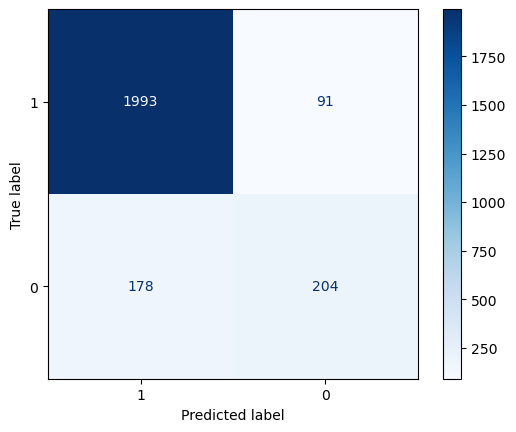

In [30]:
# Confusion matrix for nn_model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 0])
disp.plot(cmap = plt.cm.Blues)
plt.show()

- Accuracy and AUC indicate strong performance (~0.89 accuracy and ~0.91 AUC).
- Visualizing the ROC curve highlights the model's ability to distinguish between classes.

## K-means clustering

In [31]:
from sklearn.cluster import KMeans

k = 5  # Replaced with the ideal number of clusters later
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_train)


In [32]:
#Now loop and save inertia

k_max = 10
kmeans_models = [KMeans(n_clusters = k, n_init = 10, random_state = 42).fit(X_train) 
                 for k in range(1, k_max+1)]

#Get the inertias
inertias = [model.inertia_ for model in kmeans_models]


In [33]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
silhouette = silhouette_score(X_train, y_pred)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")


Inertia: 116335.94462546727
Silhouette Score: 0.11554185734875383


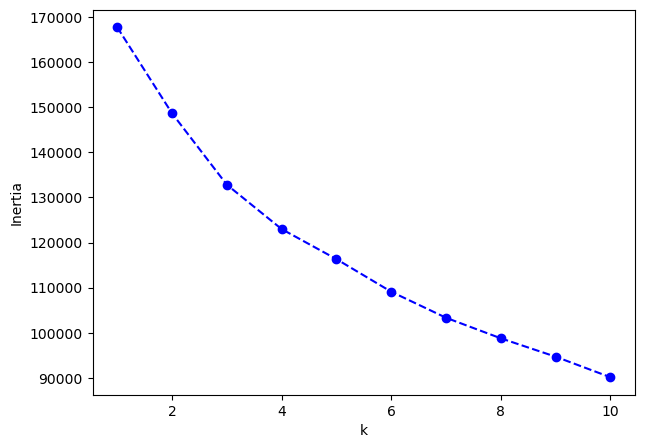

In [34]:
fig, ax1 = plt.subplots(1, 1, figsize = (7, 5))

ax1.plot(range(1, k_max+1), inertias, "bo--")

ax1.set_xlabel('k')
ax1.set_ylabel('Inertia');

In [35]:
from sklearn.cluster import KMeans

k = 4  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [36]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
silhouette = silhouette_score(X_train, y_pred)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")


Inertia: 122991.68939931988
Silhouette Score: 0.19293718728842288


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_clf = RandomForestClassifier(n_estimators=500,
                            max_features='sqrt',
                             oob_score=True, random_state=42)
forest_clf.fit(X_train, y_train.ravel())

y_rf_pred = forest_clf.predict(X_test)

print(f"Training Accuracy: {forest_clf.oob_score_:.3f}")
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Training Accuracy: 0.904
Random Forest Accuracy on test set: 0.898


In [38]:
for name, importance in zip(X.columns, forest_clf.feature_importances_):
    print(f"{name}: {importance}")


Administrative: 0.04255744329475029
Administrative_Duration: 0.0586784746725931
BounceRates: 0.05563180561992884
Browser: 0.01827172110590198
ExitRates: 0.09226419805689967
Informational: 0.01713966775346402
Informational_Duration: 0.02625619132277247
Month: 0.041905156445198787
OperatingSystems: 0.017256877756429926
PageValues: 0.3847041713637398
ProductRelated: 0.07361423964827954
ProductRelated_Duration: 0.0873637605257105
Region: 0.029908299864920343
SpecialDay: 0.003405664076895305
TrafficType: 0.030243134585522465
VisitorType: 0.01105341784430445
Weekend: 0.009745776062688602


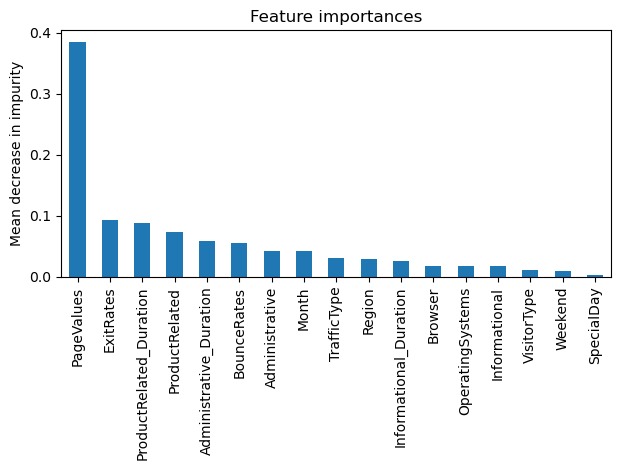

In [39]:
forest_importances = pd.Series(forest_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [40]:
##Function for the decision boundaries:


#Colormap we'll use:

from matplotlib.colors import ListedColormap
my_cmap = (ListedColormap(["red", "blue"]))

##Let's make a function to plot our decision surface:
######

def plot_contour(X, clf, ax):
    #Range for contour:
    x1 = np.min(X[:,0]); x2 = np.max(X[:,0])*1.025
    y1 = np.min(X[:,1]); y2 = np.max(X[:,1])*1.025

    if (x1 < 0):
        x1 = x1 * 1.025
    else:
        x1 = x1 * .975
        
    if (y1 < 0):
        y1 = y1 * 1.025
    else:
        y1 = y1 * .975
        
    #Points for contour
    X1, Y1 = np.meshgrid(np.linspace(x1, x2, 200),
                             np.linspace(y1, y2, 200))

    #Get as Nx2:
    XY_ravel = np.c_[X1.ravel(), Y1.ravel()]


    #Get the class:
    Z = clf.predict(XY_ravel)

    #Reshape back:
    Z = Z.reshape(X1.shape)


    #Plot:
    ax.contourf(X1, Y1, Z, 10, alpha=.5, cmap=my_cmap)

    ax.contour(X1, Y1, Z, 1, alpha=1, linewidths=1, colors='black')

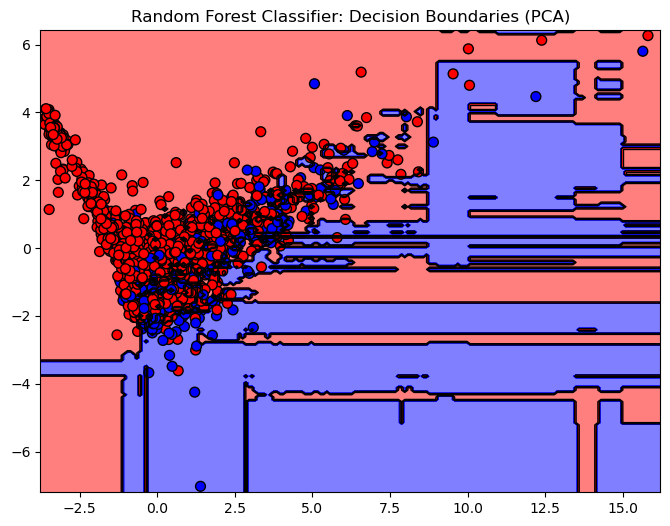

In [41]:
from sklearn.decomposition import PCA

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train the Random Forest classifier on the reduced data
forest_clf.fit(X_train_2d, y_train.ravel())

fig, ax = plt.subplots(figsize=(8, 6))

# Plot decision boundaries for Random Forest
plot_contour(X_test_2d, forest_clf, ax)

ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='black', s=50, cmap=my_cmap)

ax.set_title("Random Forest Classifier: Decision Boundaries (PCA)")

plt.show()



Key Findings:
- Neural Network:

  - High accuracy (89%) and strong AUC (91%) validate its ability to predict purchases effectively.
  - Suitable for applications needing sophisticated patterns.
  
- Random Forest:

  - Adds interpretability, identifying critical features like PageValues and BounceRates.
  - Comparable accuracy, slightly lagging behind the neural network.
  
Limitations:
- Data Overlap: Moderate clustering performance suggests overlapping features.
- Imbalanced Target: Purchase sessions (~16%) are underrepresented, affecting recall.


## Conclusion

The analysis and modeling of the Online Shoppers Purchasing Intention Dataset provided valuable insights into customer behavior and the factors influencing purchase decisions. Using a combination of exploratory analysis, clustering, and predictive modeling, we successfully identified key predictors of purchase behavior, including PageValues, BounceRates, and ExitRates. The results from the neural network (accuracy of 89% and AUC of 91%) and the random forest classifier (interpretable feature importance) demonstrate the potential for businesses to leverage machine learning in enhancing their e-commerce platforms.